##### 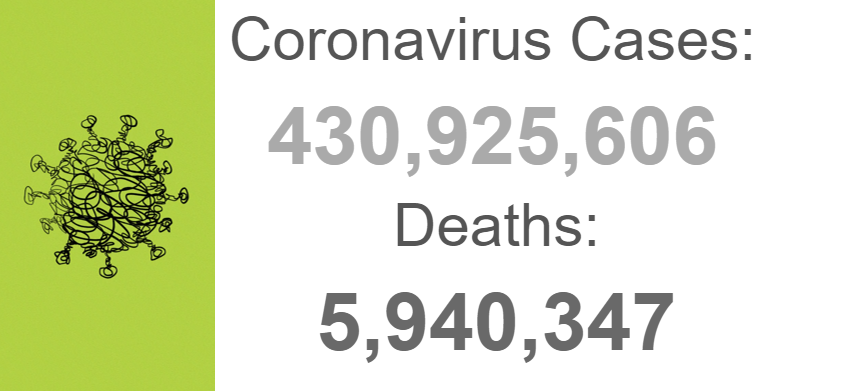

# Introduction:
The COVID-19 pandemic, also known as the coronavirus pandemic, is an ongoing global pandemic of coronavirus disease 2019.  The World Health Organization (WHO) declared a Public Health Emergency of International Concern on 30 January 2020 and a pandemic on 11 March 2020. As of 20 February 2022, the pandemic had caused more than 423 million cases and 5.88 million deaths, making it one of the deadliest in history.

We were looking for an interesting and relevant topic for the project and what is more interesting than the corona which has been an integral part of our lives for more than two years

 In this project we gathered data about the corona worldwide from various sources in order to build a model, using what we have learnd in class (and with a "little bit" help from the internt), that will eventually predict the number of deaths caused by the corona virus in each country.

### Our data:

 We have about 226 Countries and each one have the data that our model will use to anlyse. Some of the columns in the data are irelevant for tha model so we will list here the main ones and later on we will expalin our steps in building the best possibole model.

#### Columns:
  - "vaccenatedPercent" : The percentage of vaccenated people for covid-19 per country with at least one dose.
  - "TotCases1MPop" : The numbers of infected with covid-19 per million people in the country.
  - "TotalRecovered1MPop" : The numbers of Recovered from covid-19 per million people in the country.
  - "Critical1MPop" : The numbers of infected in critical condition from covid-19 per million people in the country.
  - "Tests1MPop" : The numbers of covid-19 Tests preformed per million people in the country.
  - "Population" : The population count.
  - "ActiveCases1MPop" : The numbers of active cases of covid-19 per million people in the country.
  
#### And the column we want to predict:
  - "Deaths1MPop" : The numbers of deaths caused by covid-19 per million people in the country.





### imports

In [1561]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn import metrics


### Scraping a table from wikipedia with the help of the command 'read_html'

In [1562]:
url = "https://he.wikipedia.org/wiki/%D7%AA%D7%91%D7%A0%D7%99%D7%AA:%D7%A8%D7%99%D7%9B%D7%95%D7%96_%D7%98%D7%91%D7%9C%D7%90%D7%95%D7%AA_%D7%9E%D7%92%D7%A4%D7%AA_%D7%94%D7%A7%D7%95%D7%A8%D7%95%D7%A0%D7%94"
df=pd.read_html(url, skiprows=3)
df = df[0]
df.head(10)

,0,1,2,3,4,5,6,7,8
0,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3],NaN
1,231 מדינות/טריטוריות + 2 ספינות,431019128,54362,79128,5940935,749,60.08%,53.28%,NaN
2,ארצות הברית[4] / [ערך],80376121,240507,9995,966649,2892,79.79%,66.50%,NaN
3,הודו / [ערך],42881179,30579,8944,512954,366,68.73%,55.59%,NaN
4,ברזיל / [ערך],28485502,132464,8318,646490,3006,82.27%,71.64%,NaN
5,צרפת / [ערך],22468239,342969,3055,137489,2099,82.29%,79.66%,NaN
6,הממלכה המאוחדת / [ערך],18773164,274171,304,161104,2353,NaN,NaN,NaN
7,רוסיה / [ערך],15928568,109072,2300,348578,2387,NaN,NaN,NaN
8,גרמניה / [ערך],14174906,168299,2494,122733,1457,75.28%,74.29%,NaN
9,טורקיה / [ערך],13762181,160340,1128,93258,1087,NaN,NaN,NaN


## The process of cleaning the data:

### Checking for null valuse

In [1563]:
df.isnull().sum()


0      2
1      6
2     15
3      6
4    160
5    309
6    401
7    462
8    660
dtype: int64

### Removing the 8th column (all null)

In [1564]:
del df[8]


### Changing the first row to be the title 

In [1565]:
df.columns = df. iloc[0]
df = df. drop(0)
df = df. reset_index(drop=True)
df.head()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
0,231 מדינות/טריטוריות + 2 ספינות,431019128,54362,79128,5940935,749,60.08%,53.28%
1,ארצות הברית[4] / [ערך],80376121,240507,9995,966649,2892,79.79%,66.50%
2,הודו / [ערך],42881179,30579,8944,512954,366,68.73%,55.59%
3,ברזיל / [ערך],28485502,132464,8318,646490,3006,82.27%,71.64%
4,צרפת / [ערך],22468239,342969,3055,137489,2099,82.29%,79.66%


### Removing the first row (Irrelevant)

In [1566]:
df = df. drop(0)
df.head()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
1,ארצות הברית[4] / [ערך],80376121,240507,9995,966649,2892,79.79%,66.50%
2,הודו / [ערך],42881179,30579,8944,512954,366,68.73%,55.59%
3,ברזיל / [ערך],28485502,132464,8318,646490,3006,82.27%,71.64%
4,צרפת / [ערך],22468239,342969,3055,137489,2099,82.29%,79.66%
5,הממלכה המאוחדת / [ערך],18773164,274171,304,161104,2353,NaN,NaN


In [1382]:

df.tail()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
655,קלקיליה,13971,203,13433,NaN,NaN,NaN,NaN
656,סלפית,11860,109,11683,NaN,NaN,NaN,NaN
657,טובאס,8565,90,8286,NaN,NaN,NaN,NaN
658,יריחו,8072,64,7874,NaN,NaN,NaN,NaN
659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Only the first 226 rows contains countries (we know that from going over the data on the website), therefore we will delete the unwanted columns

In [1567]:
for i in range (227,660):
    df = df.drop(i)



In [1568]:
df.tail()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
222,MS Zaandam‏ (אנ') אוניית תענוגות,9,NaN,0,2,NaN,NaN,NaN
223,איי מרשל,7,117,0,0,NaN,NaN,NaN
224,איי קוק,6,341,?,0,NaN,NaN,NaN
225,סנט הלנה,2,327,0,0,NaN,NaN,NaN
226,מיקרונזיה,1,9,0,0,NaN,NaN,NaN


###  In this point we noticed that we have lots of null valuse so we searched for another table in order to fill the missing data.

### We found a table with all the countries and their presentage of vaccenated.

In [1569]:
url = "https://en.wikipedia.org/wiki/COVID-19_vaccine"
df2 =pd.read_html(url, skiprows=1)
df2 = df2[1]
df2.head(10)

,Unnamed: 0,World[d],"4,928,717,485",62.6%
0,NaN,China,1268180000,87.8%
1,NaN,India,963841804,69.2%
2,NaN,European Union,335083244,74.9%
3,NaN,United States[e],253179401,76.3%
4,NaN,Indonesia,190092902,68.8%
5,NaN,Brazil,176920320,82.7%
6,NaN,Pakistan,124309711,55.2%
7,NaN,Bangladesh,103358935,62.1%
8,NaN,Japan,101626424,80.6%
9,NaN,Mexico,85083649,65.3%


In [1570]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     0 non-null      float64
 1   World[d]       221 non-null    object 
 2   4,928,717,485  221 non-null    int64  
 3   62.6%          221 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.0+ KB


## Cleaning the data:

In [1571]:
del df2['Unnamed: 0'] # allm null
del df2['4,928,717,485'] # population
df2.head()

,World[d],62.6%
0,China,87.8%
1,India,69.2%
2,European Union,74.9%
3,United States[e],76.3%
4,Indonesia,68.8%


In [1388]:
df2.rename({'World[d]': 'Country','62.6%':'vaccenated'}, axis=1, inplace=True)
df2.head()

,Country,vaccenated
0,China,87.8%
1,India,69.2%
2,European Union,74.9%
3,United States[e],76.3%
4,Indonesia,68.8%


In [1572]:
df2 = df2.replace(regex=[' '], value='') #delete spaces
df2.head()

,World[d],62.6%
0,China,87.8%
1,India,69.2%
2,EuropeanUnion,74.9%
3,UnitedStates[e],76.3%
4,Indonesia,68.8%


### We encountered with 2 problems:
- Our first table "df1" is in hebrew and we ran in to problems when trying to download the translation library. 
- We still have a lack of data.

### so we kept on searching for more data.

### For this table we had to use a diffrent technique for web scraping.


In [1391]:

url = "https://www.worldometers.info/coronavirus/?utm_campaign=homeAdvegas1?/embed/fd0k_hbXWcQ"

res = requests.get(url) #our requests object 
soup = bs(res.content, 'html.parser') # using beautifulsoup 

table_data = soup.select_one('#main_table_countries_today') #scraping the table tag


In [1392]:
# creating data frame with the table colums 
headers = []
for i in table_data.find_all('th'):
    title = i.text
    headers.append(title)
df3 = pd.DataFrame(columns = headers)

In [1393]:
#adding to the data frame the values in each row from the table
for j in table_data.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [tr.text for tr in row_data]
        length = len(df3)
        
        df3.loc[length] = row
df3.head() 

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,\nNorth America\n,"94,525,581","+29,647","1,393,179",+735,"64,782,911","+28,379","28,349,491","16,245",...,,,,North America,\n,,,,,
1,,\nAsia\n,"114,305,432","+549,129","1,340,834","+1,764","105,826,826","+348,973","7,137,772","31,135",...,,,,Asia,\n,,,,,
2,,\nSouth America\n,"53,775,113","+31,469","1,252,673",+230,"47,183,295","+18,243","5,339,145","13,794",...,,,,South America,\n,,,,,
3,,\nEurope\n,"153,636,973","+607,261","1,698,642","+2,707","128,581,047","+1,107,138","23,357,284","15,805",...,,,,Europe,\n,,,,,
4,,\nAfrica\n,"11,490,787","+4,408","248,591",+40,"10,531,761","+8,888","710,435","1,871",...,,,,Africa,\n,,,,,


In [1394]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    242 non-null    object
 1   Country,Other        242 non-null    object
 2   TotalCases           242 non-null    object
 3   NewCases             242 non-null    object
 4   TotalDeaths          242 non-null    object
 5   NewDeaths            242 non-null    object
 6   TotalRecovered       242 non-null    object
 7   NewRecovered         242 non-null    object
 8   ActiveCases          242 non-null    object
 9   Serious,Critical     242 non-null    object
 10  Tot Cases/1M pop     242 non-null    object
 11  Deaths/1M pop        242 non-null    object
 12  TotalTests           242 non-null    object
 13  Tests/
1M pop
       242 non-null    object
 14  Population           242 non-null    object
 15  Continent            242 non-null    object
 16  1 Caseev

## More cleaning...

In [1573]:
df3 = df3.replace(regex=['\n'], value='')
df3 = df3.replace(regex=[' '], value='')
df3 = df3.replace(regex=[','], value='')

### We noticed that some of contruies has a diffrent name from "df2" so we changed some of the ones we found

In [1574]:

df2['Country'] = df2['Country'].replace(['UnitedStates[e]'],'USA')
df2['Country'] = df2['Country'].replace(['UnitedKingdom'],'UK')
df2['Country'] = df2['Country'].replace(['Italy[f]'],'Italy')
df2['Country'] = df2['Country'].replace(['SouthKorea'],'S.Korea')
df2.head(20)

KeyError: 'Country'

#### We noticed that the columns with 'new' cases/deaths/recovered.. are missing lots of data. In any case, our assumption is that there isn't a strong co variance between them and the column "TotalDeaths"
### therefore we decided to drop those colomns

In [1396]:
del df3['NewCases'] # mostly null values
del df3['NewDeaths'] # mostly null values
del df3['NewRecovered'] # mostly null values
del df3['Continent'] # irrelevent
del df3['New Deaths/1M pop'] # mostly null values
del df3['New Cases/1M pop'] # mostly null values
del df3['TotalCases'] # we have per 1M
del df3['TotalDeaths'] # we have per 1M
del df3['TotalTests'] # we have per 1M
del df3['ActiveCases'] # we have per 1M
del df3['1 Caseevery X ppl'] # we have per 1M
del df3['1 Deathevery X ppl'] # we have per 1M
del df3['1 Testevery X ppl'] # we have per 1M
del df3['#'] # irrelevent


df3.head()

,#,"Country,Other",TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
0,,NorthAmerica,64782911,16245,,,,,
1,,Asia,105826826,31135,,,,,
2,,SouthAmerica,47183295,13794,,,,,
3,,Europe,128581047,15805,,,,,
4,,Africa,10531761,1871,,,,,


### Droping the first 7 rows which are irrelevent (Continents and the whole world)

In [1397]:
for i in range (0,8):
    df3 = df3.drop(i)
df3.head()

,#,"Country,Other",TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
8,1,USA,52455948,9995,240513,2893,2825187,334194157,80657
9,2,India,42219896,8944,30579,366,544508,1402309809,106
10,3,Brazil,25772807,8318,132464,3006,296573,215043743,9608
11,4,France,20009852,3055,342969,2099,3717379,65511023,35428
12,5,UK,17088177,304,274171,2353,7003655,68472378,22255


In [1398]:
df3.rename({'Country,Other': 'Country'}, axis=1, inplace=True)
df3.head()

,#,Country,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
8,1,USA,52455948,9995,240513,2893,2825187,334194157,80657
9,2,India,42219896,8944,30579,366,544508,1402309809,106
10,3,Brazil,25772807,8318,132464,3006,296573,215043743,9608
11,4,France,20009852,3055,342969,2099,3717379,65511023,35428
12,5,UK,17088177,304,274171,2353,7003655,68472378,22255


### Merging "df2" with "df3" 

In [1400]:
final_df = pd.merge( df2, df3, how="left", on=["Country", "Country"])
final_df.head()

,Country,vaccenated,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
0,China,87.8%,101646,18,75,3,111163,1439323776,1
1,India,69.2%,42219896,8944,30579,366,544508,1402309809,106
2,EuropeanUnion,74.9%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,76.3%,52455948,9995,240513,2893,2825187,334194157,80657
4,Indonesia,68.8%,4674873,2807,19435,529,298354,278278496,2106


In [1401]:
final_df.isnull().sum()

Country                 0
vaccenated              0
TotalRecovered         23
Serious,Critical       23
Tot Cases/1M pop       23
Deaths/1M pop          23
Tests/\n1M pop\n       23
Population             23
Active Cases/1M pop    23
dtype: int64

### We have 23 Countries that didn't find a match, we decided to delete them because the column of the presentege of vaccenation is more important. In a diffrent virsion we tried to fill them using interpolate() but we didn't get the best score.


In [1402]:
final_df.shape

(221, 9)

In [1403]:
final_df = final_df.dropna()
final_df.isnull().sum()

Country                0
vaccenated             0
TotalRecovered         0
Serious,Critical       0
Tot Cases/1M pop       0
Deaths/1M pop          0
Tests/\n1M pop\n       0
Population             0
Active Cases/1M pop    0
dtype: int64

In [1404]:
final_df.shape

(198, 9)

### chainging the colomn 'Country' to be the leading index

In [1405]:
final_df = final_df.set_index('Country')
final_df.head()

,vaccenated,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,,,
China,87.8%,101646,18,75,3,111163,1439323776,1
India,69.2%,42219896,8944,30579,366,544508,1402309809,106
USA,76.3%,52455948,9995,240513,2893,2825187,334194157,80657
Indonesia,68.8%,4674873,2807,19435,529,298354,278278496,2106
Brazil,82.7%,25772807,8318,132464,3006,296573,215043743,9608


In [1406]:
final_df = final_df.replace(regex=['%'], value='') 
final_df = final_df.replace(regex=[''], value=np.nan) # empty valuse
final_df = final_df.replace(regex=['N/A'], value=np.nan) # empty valuse
final_df = final_df.replace(regex=[' '], value='') # removing spaces
final_df.isnull().sum()
final_df.tail()


,vaccenated,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,,,
Anguilla,67.6,2506,4,166065,591,3375287,15223,854
Burundi,0.1,773,NaN,3049,3,27721,12472255,2984
WallisandFutuna,55.4,438,NaN,41594,641,1878882,10915,825
FalklandIslands,75.6,NaN,NaN,24410,NaN,2367526,3646,1097
Montserrat,37.4,161,NaN,32620,400,1560136,4997,NaN


In [1407]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, China to Montserrat
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   vaccenated           198 non-null    object
 1   TotalRecovered       190 non-null    object
 2   Serious,Critical     151 non-null    object
 3   Tot Cases/1M pop     198 non-null    object
 4   Deaths/1M pop        194 non-null    object
 5   Tests/
1M pop
       189 non-null    object
 6   Population           198 non-null    object
 7   Active Cases/1M pop  197 non-null    object
dtypes: object(8)
memory usage: 13.9+ KB


In [1408]:
final_df.isnull().sum()


vaccenated              0
TotalRecovered          8
Serious,Critical       47
Tot Cases/1M pop        0
Deaths/1M pop           4
Tests/\n1M pop\n        9
Population              0
Active Cases/1M pop     1
dtype: int64

### we checked why we have so much empty valuse in the colomn "Serious,Critical", so we thought maby thay have no  Serious cases, so we checed online and we found that we were right! - https://www.coronatracker.com/country/georgia/ , https://www.coronatracker.com/country/united-arab-emirates/



In [1409]:
final_df['Serious,Critical'].fillna('0', inplace = True)
final_df.tail()

,vaccenated,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,,,
Anguilla,67.6,2506,4,166065,591,3375287,15223,854
Burundi,0.1,773,0,3049,3,27721,12472255,2984
WallisandFutuna,55.4,438,0,41594,641,1878882,10915,825
FalklandIslands,75.6,NaN,0,24410,NaN,2367526,3646,1097
Montserrat,37.4,161,0,32620,400,1560136,4997,NaN


In [1410]:

final_df = final_df.dropna()

In [1411]:
final_df.isnull().sum()

vaccenated             0
TotalRecovered         0
Serious,Critical       0
Tot Cases/1M pop       0
Deaths/1M pop          0
Tests/\n1M pop\n       0
Population             0
Active Cases/1M pop    0
dtype: int64

In [1412]:
final_df.shape

(182, 8)

### custing all colomns to float

In [1413]:
for i in final_df:
    final_df[i] = final_df[i].astype(float, errors = 'raise')

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, China to WallisandFutuna
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vaccenated           182 non-null    float64
 1   TotalRecovered       182 non-null    float64
 2   Serious,Critical     182 non-null    float64
 3   Tot Cases/1M pop     182 non-null    float64
 4   Deaths/1M pop        182 non-null    float64
 5   Tests/
1M pop
       182 non-null    float64
 6   Population           182 non-null    float64
 7   Active Cases/1M pop  182 non-null    float64
dtypes: float64(8)
memory usage: 12.8+ KB


### Normalization per million

In [1414]:
for rows in  range (0,145):
    final_df['TotalRecovered'][rows] = final_df['TotalRecovered'][rows] / final_df['Population'][rows] * 1000000  
    final_df['Serious,Critical'][rows] = final_df['Serious,Critical'][rows] / final_df['Population'][rows] * 1000000    
final_df.rename({'TotalRecovered': 'TotalRecovered1MPop','Serious,Critical': 'Critical1MPop' }, axis=1, inplace=True)
final_df.tail()

,vaccenated,TotalRecovered1MPop,Critical1MPop,Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,,,
SanMarino,72.2,13703.0,4.0,417264.0,3289.0,3955240.0,34048.0,11513.0
CaribbeanNetherlands,72.3,7418.0,0.0,283504.0,1164.0,1131535.0,26624.0,3718.0
Anguilla,67.6,2506.0,4.0,166065.0,591.0,3375287.0,15223.0,854.0
Burundi,0.1,773.0,0.0,3049.0,3.0,27721.0,12472255.0,2984.0
WallisandFutuna,55.4,438.0,0.0,41594.0,641.0,1878882.0,10915.0,825.0


### editing colomns name

In [1415]:

final_df = final_df.set_axis(['vaccenatedPresent','TotalRecovered1MPop', 'Critical1MPop', 'TotCases1MPop', 'Deaths1MPop', 'Tests1MPop','Population', 'ActiveCases1MPop'
], axis=1, inplace=False)


final_df.head()

,vaccenatedPresent,TotalRecovered1MPop,Critical1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop,Population,ActiveCases1MPop
Country,,,,,,,,
China,87.8,70.620663,0.012506,75.0,3.0,111163.0,1.439324e+09,1.0
India,69.2,30107.395476,6.378049,30579.0,366.0,544508.0,1.402310e+09,106.0
USA,76.3,156962.492914,29.907764,240513.0,2893.0,2825187.0,3.341942e+08,80657.0
Indonesia,68.8,16799.260695,10.087017,19435.0,529.0,298354.0,2.782785e+08,2106.0
Brazil,82.7,119849.136927,38.680502,132464.0,3006.0,296573.0,2.150437e+08,9608.0


In [1416]:
del final_df['TotalRecovered1MPop'] 
### We later on discoverd that this column completes the column that we wanted to predict and we received an accurate model 
del final_df['Population'] # not helpful
final_df.head()

,vaccenatedPresent,Critical1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop,ActiveCases1MPop
Country,,,,,,
China,87.8,0.012506,75.0,3.0,111163.0,1.0
India,69.2,6.378049,30579.0,366.0,544508.0,106.0
USA,76.3,29.907764,240513.0,2893.0,2825187.0,80657.0
Indonesia,68.8,10.087017,19435.0,529.0,298354.0,2106.0
Brazil,82.7,38.680502,132464.0,3006.0,296573.0,9608.0


### lets check outlyers

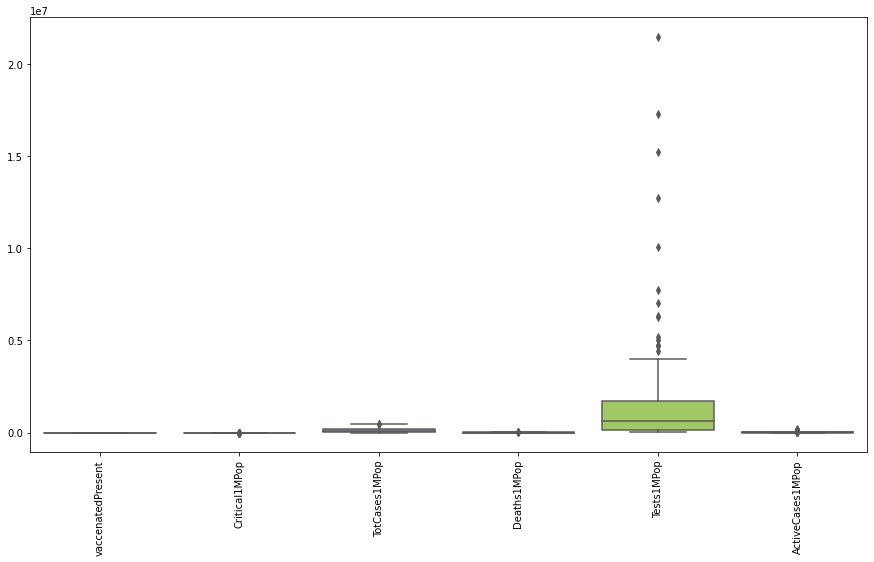

In [1417]:
final_df_no_out = final_df
plt.figure(figsize=(15,8))
sns.boxplot(data = final_df,palette = "Set2")
plt.xticks(rotation=90)
plt.show()


### we have some  Outliers, lets remove them and tray the modeles again.


In [1418]:

def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()
    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' ******************************************************\n')
    
    df = df1.copy()
    return df





In [1419]:

final_df_no_out = removeOutlier(final_df.vaccenatedPresent, final_df)
final_df_no_out = removeOutlier(final_df.Critical1MPop, final_df)
final_df_no_out = removeOutlier(final_df.TotCases1MPop, final_df)
final_df_no_out = removeOutlier(final_df.Deaths1MPop, final_df)
final_df_no_out = removeOutlier(final_df.Tests1MPop, final_df)
final_df_no_out = removeOutlier(final_df.ActiveCases1MPop, final_df)

lowerbound:  -27.679729518317096  -------- upperbound:  134.85445479304235
0  number of outliers from  182
 ******************************************************

lowerbound:  -38.143185453878644  -------- upperbound:  63.08701523532751
3  number of outliers from  182
 ******************************************************

lowerbound:  -242685.94662513043  -------- upperbound:  476582.67189985566
1  number of outliers from  182
 ******************************************************

lowerbound:  -2312.0574975853633  -------- upperbound:  4541.398156926022
2  number of outliers from  182
 ******************************************************

lowerbound:  -6902116.436634066  -------- upperbound:  10019295.194875823
5  number of outliers from  182
 ******************************************************

lowerbound:  -80610.01814241117  -------- upperbound:  112951.03792263093
6  number of outliers from  182
 ******************************************************



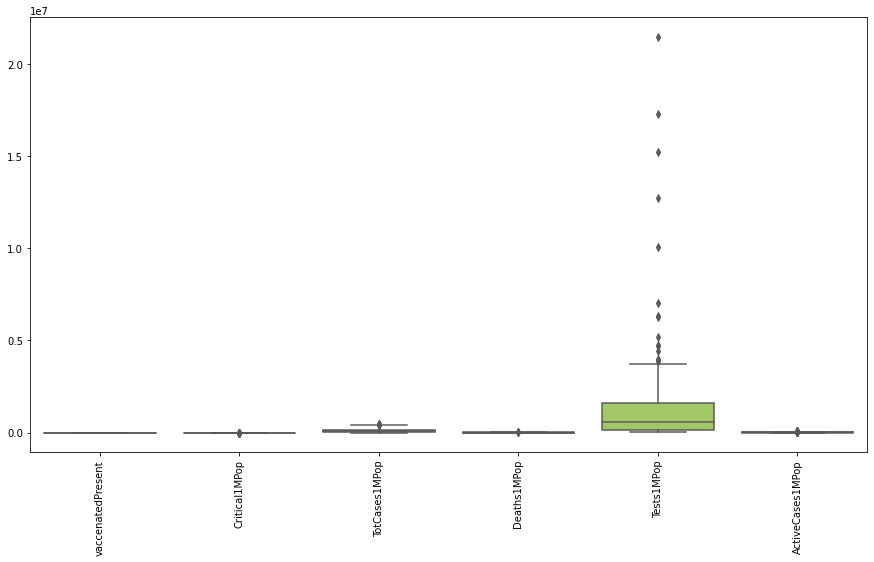

In [1420]:

plt.figure(figsize=(15,8))
sns.boxplot(data = final_df_no_out,palette = "Set2")
plt.xticks(rotation=90)
plt.show()

In [1421]:

final_df_no_out.shape


(176, 6)

In [1422]:
final_df.shape

(182, 6)

In [1423]:
final_df = final_df_no_out

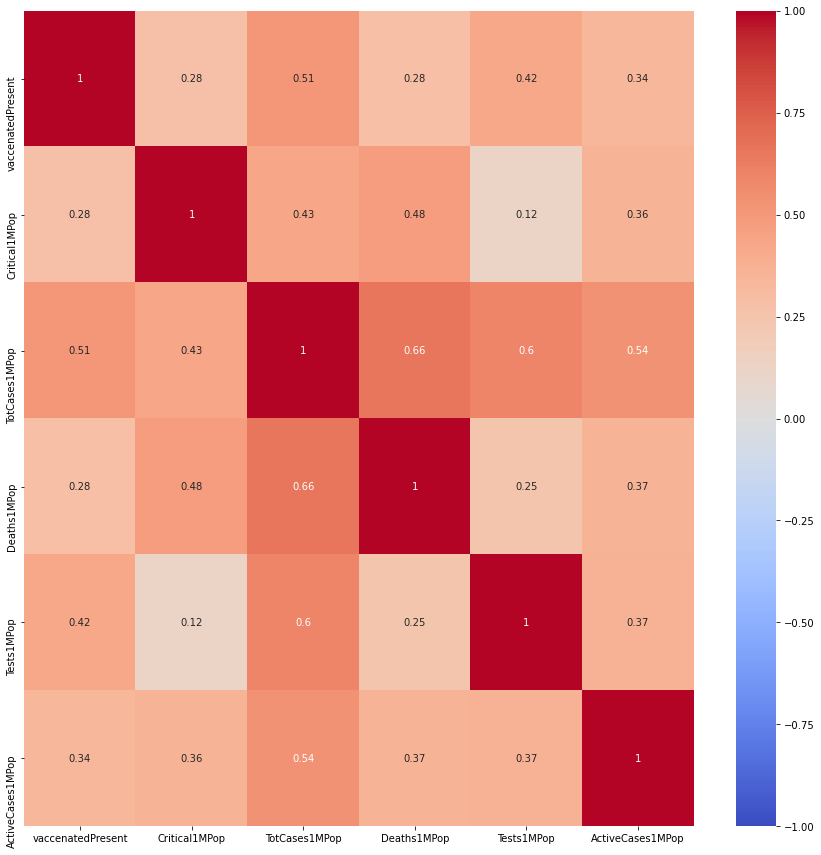

In [1424]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = final_df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [1425]:
corr[abs(corr['Deaths1MPop']) > 0.0]['Deaths1MPop']

vaccenatedPresent    0.283814
Critical1MPop        0.480991
TotCases1MPop        0.656755
Deaths1MPop          1.000000
Tests1MPop           0.247496
ActiveCases1MPop     0.366715
Name: Deaths1MPop, dtype: float64

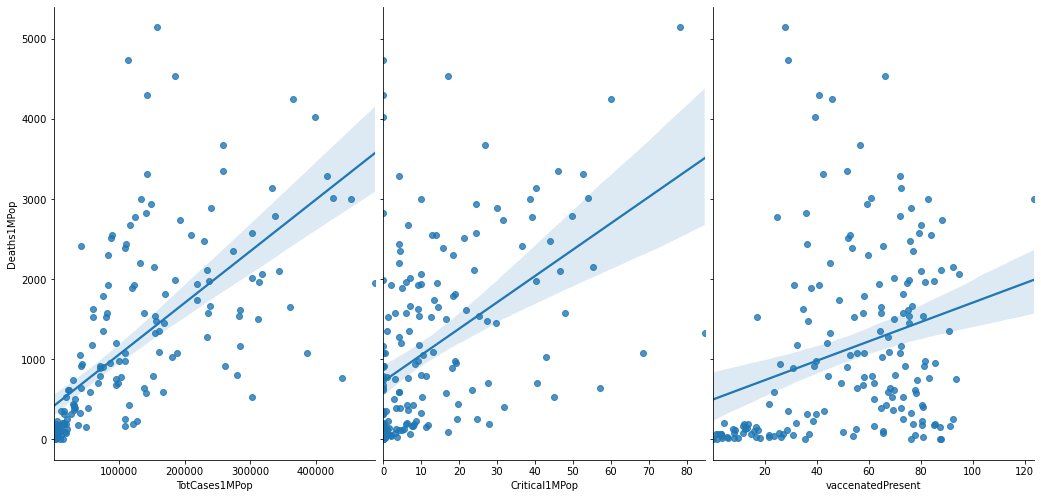

In [1426]:
sns.pairplot(final_df, x_vars=['TotCases1MPop','Critical1MPop','vaccenatedPresent'], y_vars='Deaths1MPop', height=7, aspect=0.7, kind='reg')

### train- test split

In [1427]:
X = final_df.drop("Deaths1MPop", axis=1)
y = final_df["Deaths1MPop"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)


### dummy model

In [1428]:


from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error as MAE

In [1429]:
dum_regr = DummyRegressor(strategy="mean")
dum_regr.fit(X_train, y_train)
dum_score = dum_regr.score(X_test, y_test)
y_predict = dum_regr.predict(X_test)
mean_absolute_error = MAE(y_test, y_predict)
print('our dummy model R squared score is ' + str(dum_score)[:6])
print( "our dummy mean absolute error is " + str(mean_absolute_error)[:4])

our dummy model R squared score is -0.033
our dummy mean absolute error is 928.


#### R squared = 1, it means that the model is perfect and if its value is 0, it means that the model will perform badly on an unseen dataset. 

## scaling the tada
#### we are checking two different scalers to see if one of them is better for our modle

In [1430]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.fit_transform(X_test)
X_train_scaled2 = scaler2.fit_transform(X_train)
X_test_scaled2 = scaler2.fit_transform(X_train)

### Linear Regression  model

In [1431]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [1432]:
linreg = LinearRegression()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_1 = cross_val_score(linreg, X_train_scaled1, y_train, cv=kf)
y_predict_1 = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
mae_1 = MAE(y_train, y_predict_1)

R2_scores_2 = cross_val_score(linreg, X_train_scaled2, y_train, cv=kf)
y_predict_2 = cross_val_predict(linreg, X_train_scaled2, y_train, cv=kf)
mae_2 = MAE(y_train, y_predict_2)

print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_1.mean()))
print("MAE score:" +(str)(mae_1))
print("result for MinMaxScaler:")
print("R2 score:" +(str)(R2_scores_2.mean()))
print("MAE score:" +(str)(mae_2))



result for StandardScaler:
R2 score:0.4677162507470173
MAE score:583.7952083845049
result for MinMaxScaler:
R2 score:0.4677162507470173
MAE score:583.795208384505


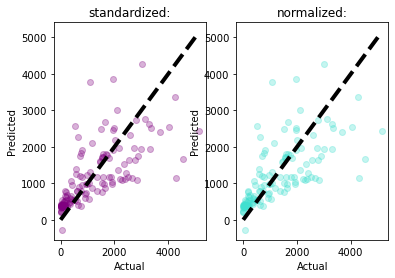

In [1433]:

fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='purple')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(linreg, X_train_scaled2, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='turquoise')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

In [1434]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(linreg.get_params())

Parameters currently in use:

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}


### as we can see there are no hyperprameters (numbers) to make the model as optimal as it couled be

### feature selection:


In [1435]:
# I will use this function for make a copy of
# train set by specific correlation limit.

# copy X with columns which grater than specific limit:
def copy_by_corr_limit(X, lim, limits):
    X_copy = X.copy()
    X_copy = pd.DataFrame(X_copy)
    for l in limits.corr:
        if (l < lim):
            X_copy.drop(l, inplace=True)
    return X_copy

In [1436]:

print('correlations (without the sign+-):')
correlations = abs(corr['Deaths1MPop']).sort_values(ascending=False)
correlations.drop('Deaths1MPop', inplace=True)
#correlations = pd.DataFrame(correlations)
#correlations.rename({'Deaths1MPop': 'corr'}, axis=1, inplace=True)

correlations

correlations (without the sign+-):


TotCases1MPop        0.656755
Critical1MPop        0.480991
ActiveCases1MPop     0.366715
vaccenatedPresent    0.283814
Tests1MPop           0.247496
Name: Deaths1MPop, dtype: float64

In [1437]:
corr_limits = [0, 0.03, 0.09, 0.25, 0.35, 0.40, 0.55, 0.552, 0.555, 0.9]

mean_scores = []
std_scores = []
mae_scores = []


#for limit in corr_limits:
   # X_train_copy = copy_by_corr_limit(X_train_scaled1, limit, correlations)
   # R2_scores = cross_val_score(linreg, X_train_copy, y_train, cv=kf)
    #y_predict = cross_val_predict(linreg, X_train_copy, y_train, cv=kf)
    #mae_score = MAE(y_train, y_predict)
 
   # mean_scores.append(R2_scores.mean())
   # std_scores.append(R2_scores.std())
   # mae_scores.append(mae_score)
    
#pd.DataFrame(data={'lim correlation:':corr_limits, 'R2_score': mean_scores, 'R2_std': std_scores, 'MAE score': mae_scores})

### Random Forest Regressor Modle

In [1438]:
from sklearn.ensemble import RandomForestRegressor

In [1439]:
RFR = RandomForestRegressor()

In [1440]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(RFR, X_train_scaled1, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR, X_train_scaled1, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)
print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))

result for StandardScaler:
R2 score:0.49632664272978444
MAE score:492.3006428571428


In [1441]:
from sklearn.model_selection import GridSearchCV

In [1442]:
k_range = list(range(1, 31))

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [1443]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RFR.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


#### n_estimators = number of trees in the foreset
####  max_features = max number of features considered for splitting a node
#### max_depth = max number of levels in each decision tree
#### min_samples_split = min number of data points placed in a node before the node is split
#### min_samples_leaf = min number of data points allowed in a leaf node
#### bootstrap = method for sampling data points (with or without replacement)

In [1444]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [1445]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = kf, verbose=2, random_state=42, n_jobs = -1, scoring='r2')
# Fit the random search model
rf_random.fit(X_train_scaled1, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=2)

In [1446]:
print("best R2 score is:")
print(rf_random.best_score_)

best R2 score is:
0.5552254030429241


In [1447]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
    
    

In [1448]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
k_r2_scores = []
k_mae_scores = []
k_range = range(30)
for K in k_range:
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    R2_scores_standardized = cross_val_score(model, X_train_scaled1, y_train, cv=kf)
    k_r2_scores.append(R2_scores_standardized.mean())
    y_predict_standardized = cross_val_predict(model, X_train_scaled1, y_train, cv=kf)
    mae_standarsized = MAE(y_train, y_predict_standardized)
    k_mae_scores.append(mae_standarsized)
    
    
print(k_r2_scores)
print(k_mae_scores)




[0.08781909601351227, 0.3581367633370034, 0.466688593972879, 0.4992976269746389, 0.501873402280092, 0.4839127899008222, 0.5213529287975092, 0.5103830786858284, 0.5007291934084686, 0.5185028820185134, 0.5149179644261693, 0.5123245597082254, 0.5015993364403544, 0.5004758520509436, 0.5086119018597778, 0.501212639892157, 0.5010009894619325, 0.5023955050481134, 0.4933800005548319, 0.49121220499812523, 0.48986571864790973, 0.4830784457628595, 0.48153889020805185, 0.4772641683396948, 0.48125695573034577, 0.477152965839188, 0.4687276880189152, 0.47020789204603003, 0.4637080992650235, 0.45809338056639587]
[681.8714285714286, 612.1464285714286, 569.147619047619, 550.2589285714286, 547.27, 546.4392857142857, 532.434693877551, 534.04375, 541.884126984127, 524.7685714285715, 529.8006493506493, 534.9178571428571, 542.4456043956044, 546.2826530612244, 544.1666666666667, 553.0455357142857, 553.9453781512606, 549.2531746031746, 551.2281954887218, 550.2192857142855, 555.1377551020408, 555.4600649350649,

Text(0, 0.5, 'Cross-Validated Accuracy')

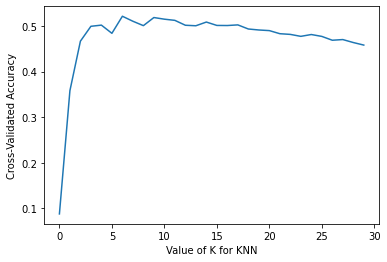

In [1449]:


import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_r2_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [1450]:
print (k_r2_scores.index(max(k_r2_scores)))
print (max(k_r2_scores))

6
0.5213529287975092


### optimal k = 10

### more data

In [1451]:
df4 = pd.read_csv("C:\\Users\\abiis\\OneDrive\\שולחן העבודה\\מדעי הנתונים\\hospitals_bed_per_1000.csv",skiprows=3)

df4.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1.959677,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,0.170627,NaN,NaN,NaN,NaN,NaN,...,0.53,0.53,0.5,0.5,0.5,0.39,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,0.781043,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2.061462,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1452]:
df5 = pd.read_csv("C:\\Users\\abiis\\OneDrive\\שולחן העבודה\\מדעי הנתונים\\Physicians_per_1000_ppl.csv",skiprows=3)

df5.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.035,NaN,NaN,NaN,NaN,0.063,...,0.2414,0.2846,0.2983,0.285,0.2782,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,AGO,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.067,NaN,NaN,NaN,NaN,0.076,...,NaN,NaN,NaN,NaN,NaN,0.214600,NaN,NaN,NaN,NaN


In [1453]:
del df4['Country Code']
del df4['Indicator Name']
del df4['Indicator Code']
df4.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1.959677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,0.170627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.53,0.53,0.5,0.5,0.5,0.39,NaN,NaN,NaN,NaN
3,Africa Western and Central,0.781043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,2.061462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1454]:
del df5['Country Code']
del df5['Indicator Name']
del df5['Indicator Code']
df5.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,0.035,NaN,NaN,NaN,NaN,0.063,NaN,NaN,NaN,...,0.2414,0.2846,0.2983,0.285,0.2782,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,0.067,NaN,NaN,NaN,NaN,0.076,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.214600,NaN,NaN,NaN,NaN


In [1455]:

df4.rename({'Unnamed: 65': 'Hospital_beds'}, axis=1, inplace=True)
df4.rename({'Country Name': 'Country'}, axis=1, inplace=True)
df4.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Hospital_beds
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1.959677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,0.170627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.53,0.53,0.5,0.5,0.5,0.39,NaN,NaN,NaN,NaN
3,Africa Western and Central,0.781043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,2.061462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1456]:
df5.rename({'Unnamed: 65': 'Physicians'}, axis=1, inplace=True)
df5.rename({'Country Name': 'Country'}, axis=1, inplace=True)
df5.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Physicians
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,0.035,NaN,NaN,NaN,NaN,0.063,NaN,NaN,NaN,...,0.2414,0.2846,0.2983,0.285,0.2782,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,0.067,NaN,NaN,NaN,NaN,0.076,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.214600,NaN,NaN,NaN,NaN


In [1457]:
df4 = df4.replace(regex=[' '], value='')
df5 = df5.replace(regex=[' '], value='')
df5.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Physicians
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AfricaEasternandSouthern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,0.035,NaN,NaN,NaN,NaN,0.063,NaN,NaN,NaN,...,0.2414,0.2846,0.2983,0.285,0.2782,NaN,NaN,NaN,NaN,NaN
3,AfricaWesternandCentral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,0.067,NaN,NaN,NaN,NaN,0.076,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.214600,NaN,NaN,NaN,NaN


In [1458]:
df4['Country'] = df4['Country'].replace(['UnitedStates'],'USA')
df5['Country'] = df5['Country'].replace(['UnitedStates'],'USA')

In [1459]:

df4 = df4.set_index('Country')
df5 = df5.set_index('Country')


In [1460]:


for column in df4:
    df4[column] = df4[column].astype(float, errors = 'raise')
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, Aruba to Zimbabwe
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1960           164 non-null    float64
 1   1961           2 non-null      float64
 2   1962           2 non-null      float64
 3   1963           2 non-null      float64
 4   1964           2 non-null      float64
 5   1965           8 non-null      float64
 6   1966           5 non-null      float64
 7   1967           5 non-null      float64
 8   1968           5 non-null      float64
 9   1969           5 non-null      float64
 10  1970           176 non-null    float64
 11  1971           8 non-null      float64
 12  1972           9 non-null      float64
 13  1973           9 non-null      float64
 14  1974           11 non-null     float64
 15  1975           91 non-null     float64
 16  1976           15 non-null     float64
 17  1977           11 non-null     float64
 18  1978  

In [1461]:
for column in df5:
    df5[column] = df5[column].astype(float, errors = 'raise')
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, Aruba to Zimbabwe
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1960        137 non-null    float64
 1   1961        18 non-null     float64
 2   1962        16 non-null     float64
 3   1963        16 non-null     float64
 4   1964        16 non-null     float64
 5   1965        108 non-null    float64
 6   1966        19 non-null     float64
 7   1967        17 non-null     float64
 8   1968        17 non-null     float64
 9   1969        17 non-null     float64
 10  1970        146 non-null    float64
 11  1971        28 non-null     float64
 12  1972        24 non-null     float64
 13  1973        26 non-null     float64
 14  1974        23 non-null     float64
 15  1975        85 non-null     float64
 16  1976        28 non-null     float64
 17  1977        29 non-null     float64
 18  1978        27 non-null     float64
 19  1979        37 non-null  

In [1462]:
for rows in range(0,227):
    for column in df4:
        if df4[column][rows] > 0:
            df4['Hospital_beds'][rows] = df4[column][rows]
            
for rows in range(0,227):
    for column in df5:
        if df5[column][rows] > 0:
            df5['Physicians'][rows] = df5[column][rows]
            
df4.head(15)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Hospital_beds
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AfricaEasternandSouthern,1.959677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.911871
Afghanistan,0.170627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.530000,0.530000,0.500000,0.500000,0.500000,0.390000,NaN,NaN,NaN,0.390000
AfricaWesternandCentral,0.781043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.474776
Angola,2.061462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000
Albania,5.102676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.880000,2.890000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.890000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000
ArabWorld,1.927301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.161831,1.150741,2.274647,1.485156,2.073525,1.380434,NaN,NaN,NaN,1.380434
UnitedArabEmirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.070000,1.150000,0.010000,1.100000,1.360000,1.380000,NaN,NaN,NaN,1.380000


In [1463]:
for column in df4:
    if column != 'Hospital_beds':
        del df4[column]
df4.head()

,Hospital_beds
Country,
Aruba,NaN
AfricaEasternandSouthern,0.911871
Afghanistan,0.390000
AfricaWesternandCentral,1.474776
Angola,0.800000


In [1464]:
for column in df5:
    if column != 'Physicians':
        del df5[column]
df5.head()

,Physicians
Country,
Aruba,1.120000
AfricaEasternandSouthern,0.191352
Afghanistan,0.278200
AfricaWesternandCentral,0.236817
Angola,0.214600


In [1465]:
df4.isnull().sum()


Hospital_beds    54
dtype: int64

In [1466]:

df5.isnull().sum()


Physicians    47
dtype: int64

In [1467]:

df4 = df4.dropna()
df4.head()



,Hospital_beds
Country,
AfricaEasternandSouthern,0.911871
Afghanistan,0.390000
AfricaWesternandCentral,1.474776
Angola,0.800000
Albania,2.890000


In [1468]:
df5 = df5.dropna()
df5.head()

,Physicians
Country,
Aruba,1.120000
AfricaEasternandSouthern,0.191352
Afghanistan,0.278200
AfricaWesternandCentral,0.236817
Angola,0.214600


In [1469]:
df4 = df4.replace(regex=[' '], value='')
df5 = df5.replace(regex=[' '], value='')

In [1470]:


df45= pd.merge(df5, df4, how="left", on="Country")



In [1471]:
df45.head()

,Physicians,Hospital_beds
Country,,
Aruba,1.120000,NaN
AfricaEasternandSouthern,0.191352,0.911871
Afghanistan,0.278200,0.390000
AfricaWesternandCentral,0.236817,1.474776
Angola,0.214600,0.800000


In [1472]:
df45.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, Aruba to Seychelles
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Physicians     219 non-null    float64
 1   Hospital_beds  212 non-null    float64
dtypes: float64(2)
memory usage: 5.1+ KB


In [1473]:
df45 = df45.dropna()
df45.info()


<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, AfricaEasternandSouthern to Seychelles
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Physicians     212 non-null    float64
 1   Hospital_beds  212 non-null    float64
dtypes: float64(2)
memory usage: 5.0+ KB


In [1474]:

final_df2 = pd.merge(final_df, df45, how="left", on="Country")
final_df2.head()



,vaccenatedPresent,Critical1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop,ActiveCases1MPop,Physicians,Hospital_beds
Country,,,,,,,,
China,87.8,0.012506,75.0,3.0,111163.0,1.0,1.9798,4.31
India,69.2,6.378049,30579.0,366.0,544508.0,106.0,0.9281,0.53
USA,76.3,29.907764,240513.0,2893.0,2825187.0,80657.0,NaN,NaN
Indonesia,68.8,10.087017,19435.0,529.0,298354.0,2106.0,0.4651,1.04
Brazil,82.7,38.680502,132464.0,3006.0,296573.0,9608.0,2.3106,2.09


In [1475]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, China to WallisandFutuna
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vaccenatedPresent  176 non-null    float64
 1   Critical1MPop      176 non-null    float64
 2   TotCases1MPop      176 non-null    float64
 3   Deaths1MPop        176 non-null    float64
 4   Tests1MPop         176 non-null    float64
 5   ActiveCases1MPop   176 non-null    float64
 6   Physicians         129 non-null    float64
 7   Hospital_beds      129 non-null    float64
dtypes: float64(8)
memory usage: 12.4+ KB


In [1476]:
final_df2.head()

,vaccenatedPresent,Critical1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop,ActiveCases1MPop,Physicians,Hospital_beds
Country,,,,,,,,
China,87.8,0.012506,75.0,3.0,111163.0,1.0,1.9798,4.31
India,69.2,6.378049,30579.0,366.0,544508.0,106.0,0.9281,0.53
USA,76.3,29.907764,240513.0,2893.0,2825187.0,80657.0,NaN,NaN
Indonesia,68.8,10.087017,19435.0,529.0,298354.0,2106.0,0.4651,1.04
Brazil,82.7,38.680502,132464.0,3006.0,296573.0,9608.0,2.3106,2.09


In [1477]:
final_df2 = final_df2.dropna()
final_df2.shape


(129, 8)

In [1478]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, China to Burundi
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vaccenatedPresent  129 non-null    float64
 1   Critical1MPop      129 non-null    float64
 2   TotCases1MPop      129 non-null    float64
 3   Deaths1MPop        129 non-null    float64
 4   Tests1MPop         129 non-null    float64
 5   ActiveCases1MPop   129 non-null    float64
 6   Physicians         129 non-null    float64
 7   Hospital_beds      129 non-null    float64
dtypes: float64(8)
memory usage: 9.1+ KB


### train_test_split

In [1479]:
X = final_df2.drop("Deaths1MPop", axis=1)
y = final_df2["Deaths1MPop"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)


In [1480]:


from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error as MAE


In [1481]:

dum_regr = DummyRegressor(strategy="mean")
dum_regr.fit(X_train, y_train)
dum_score = dum_regr.score(X_test, y_test)
y_predict = dum_regr.predict(X_test)
mean_absolute_error = MAE(y_test, y_predict)
print('our dummy model R squared score is ' + str(dum_score)[:6])
print( "our dummy mean absolute error is " + str(mean_absolute_error)[:4])

our dummy model R squared score is -0.042
our dummy mean absolute error is 713.


In [1482]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.fit_transform(X_test)
X_train_scaled2 = scaler2.fit_transform(X_train)
X_test_scaled2 = scaler2.fit_transform(X_train)


In [1483]:
linreg = LinearRegression()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_1 = cross_val_score(linreg, X_train_scaled1, y_train, cv=kf)
y_predict_1 = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
mae_1 = MAE(y_train, y_predict_1)

R2_scores_2 = cross_val_score(linreg, X_train_scaled2, y_train, cv=kf)
y_predict_2 = cross_val_predict(linreg, X_train_scaled2, y_train, cv=kf)
mae_2 = MAE(y_train, y_predict_2)

print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_1.mean()))
print("MAE score:" +(str)(mae_1))
print("result for MinMaxScaler:")
print("R2 score:" +(str)(R2_scores_2.mean()))
print("MAE score:" +(str)(mae_2))



result for StandardScaler:
R2 score:0.46197122554948766
MAE score:658.9962243750111
result for MinMaxScaler:
R2 score:0.4619712255494875
MAE score:658.9962243750115


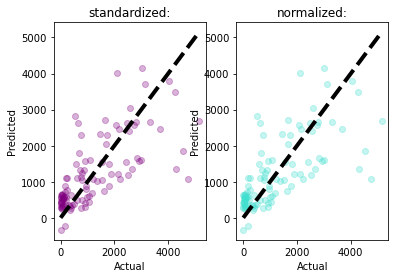

In [1484]:

fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='purple')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(linreg, X_train_scaled2, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='turquoise')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

In [1485]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(RFR, X_train_scaled1, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR, X_train_scaled1, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)
print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))


result for StandardScaler:
R2 score:0.5198292764844903
MAE score:542.146504854369


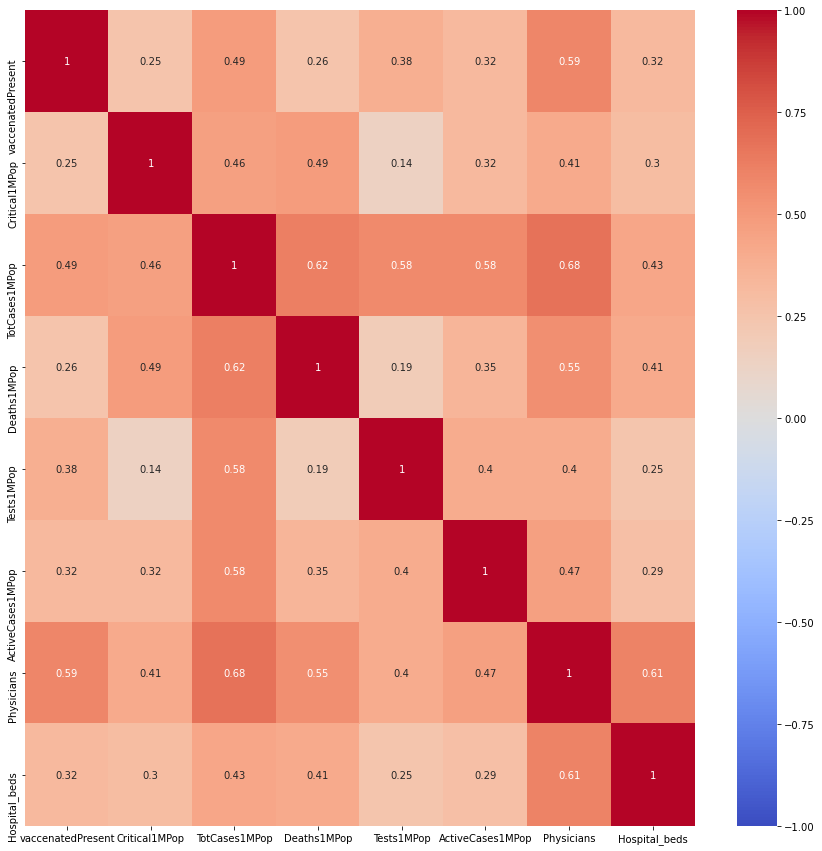

In [1486]:
corr = final_df2.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()



In [1487]:
corr[abs(corr['Deaths1MPop']) > 0.0]['Deaths1MPop']

vaccenatedPresent    0.255502
Critical1MPop        0.488188
TotCases1MPop        0.624147
Deaths1MPop          1.000000
Tests1MPop           0.194198
ActiveCases1MPop     0.347945
Physicians           0.552178
Hospital_beds        0.411388
Name: Deaths1MPop, dtype: float64

In [1488]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [1489]:

kf = KFold(n_splits=5, random_state=42, shuffle=True)
k_r2_scores = []
k_mae_scores = []
k_range = range(30)
for K in k_range:
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    R2_scores_standardized = cross_val_score(model, X_train_scaled1, y_train, cv=kf)
    k_r2_scores.append(R2_scores_standardized.mean())
    y_predict_standardized = cross_val_predict(model, X_train_scaled1, y_train, cv=kf)
    mae_standarsized = MAE(y_train, y_predict_standardized)
    k_mae_scores.append(mae_standarsized)
    
    
print(k_r2_scores)
print(k_mae_scores)



[0.22564451578666173, 0.2727166502325897, 0.3104185155655303, 0.32634472025094635, 0.35139901015067154, 0.41398755390392045, 0.4319651837722974, 0.44179709673874046, 0.4380045839463884, 0.446225069769293, 0.47908945373924405, 0.49382705480204836, 0.4964450365694238, 0.4872056829427918, 0.4791017669112588, 0.47402719793991793, 0.4878642876808635, 0.4814042840489017, 0.4725032176997518, 0.46649955366118034, 0.45388495889711783, 0.4520113032714216, 0.44804286044911323, 0.45157509323812317, 0.43887592916296503, 0.43811867178517616, 0.43597665696932, 0.41759160974994386, 0.4130944342201663, 0.41355320079667096]
[712.8155339805825, 677.7233009708738, 642.8122977346279, 638.8834951456311, 618.1533980582524, 597.7119741100324, 593.9112343966715, 596.9745145631068, 601.9665587918016, 601.8242718446603, 590.4395410414828, 580.4482200647249, 579.462285287528, 578.2128987517336, 585.262783171521, 592.2675970873786, 592.9240434037692, 603.9983818770226, 614.8421052631579, 621.221359223301, 633.0272

Text(0, 0.5, 'Cross-Validated Accuracy')

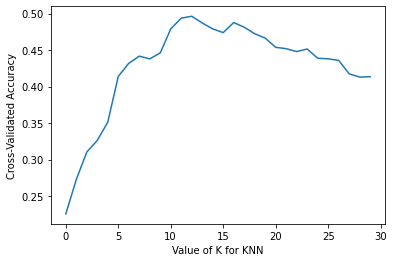

In [1490]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_r2_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [1491]:
print(k_r2_scores.index(max(k_r2_scores)))
print(max(k_r2_scores))

12
0.4964450365694238


### optimal k = 12

In [1492]:
url = "https://en.wikipedia.org/wiki/COVID-19_vaccination_in_the_United_States"
df7 =pd.read_html(url, skiprows=1)
df7 = df7[2]
df7.head(10)



,Alabama,"2,489,954",58.1%
0,Alaska,473411,64.7%
1,Arizona,4858243,66.7%
2,Arkansas,1881140,62.3%
3,California,32416845,82.0%
4,Colorado,4262561,74.0%
5,Connecticut,3128940,87.8%
6,Delaware,741038,76.1%
7,Florida,15887600,74.0%
8,Georgia,6439993,60.7%
9,Hawaii,1219631,86.1%


In [1493]:


del df7['2,489,954']
df7.head()


,Alabama,58.1%
0,Alaska,64.7%
1,Arizona,66.7%
2,Arkansas,62.3%
3,California,82.0%
4,Colorado,74.0%


In [1494]:
df7.rename({'Alabama': 'Country','58.1%':'vaccenated'}, axis=1, inplace=True)


In [1495]:
df7.iloc[-1] = ['Alabama', '58.1%']
df7.tail()

,Country,vaccenated
58,Marshall Islands,33.5%
59,Micronesia,47.3%
60,Palau,87.0%
61,Compact of Free Association,55.9%
62,Alabama,58.1%


In [1496]:

#df['Country'].rename({0: 'Country', 1: 'unfaction'}, axis=1, inplace=True)
df7 = df7.replace(regex=[' '], value='')
df7.head()

,Country,vaccenated
0,Alaska,64.7%
1,Arizona,66.7%
2,Arkansas,62.3%
3,California,82.0%
4,Colorado,74.0%


In [1497]:
url = "https://www.worldometers.info/coronavirus/country/us/"

res = requests.get(url)
soup = bs(res.content, 'html.parser')

table_data = soup.select_one('#usa_table_countries_today')

res


<Response [200]>

In [1498]:
headers = []
for i in table_data.find_all('th'):
    title = i.text
    headers.append(title)


df6 = pd.DataFrame(columns = headers)

df6.shape
len(df6)

0

In [1499]:
for j in table_data.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [tr.text for tr in row_data]
        length = len(df6)
        df6 = df6.append(pd.Series(row, index=df6.columns[:len(row)]), ignore_index=True)
df6.head()

,#,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Source,Projections
0,,USA Total,"80,377,882","+5,478","966,736",+206,"52,455,948","26,955,198","242,832","2,921","944,161,025","2,852,427",,,
1,1,\nCalifornia,"8,929,531",\n,"\n84,668",,\nN/A,\nN/A,"225,994","2,143","\n145,945,122","3,693,670","\n39,512,223",\n[view by county] [1],\n[projections]\n
2,2,\nTexas,"6,606,859",\n,"\n84,572",,\nN/A,\nN/A,"227,855","2,917","\n59,804,714","2,062,524","\n28,995,881",\n[view by county] [1] [2] [3],\n[projections]\n
3,3,\nFlorida,"5,838,185",\n,"\n68,955",,"\n3,921,624","\n1,847,606","271,825","3,211","\n53,762,948","2,503,194","\n21,477,737",\n[view by county] [1] [2] [3] [4],\n[projections]\n
4,4,\nNew York,"5,062,860",\n,"\n67,620",,"\n2,810,441","\n2,184,799","260,254","3,476","\n100,300,807","5,155,910","\n19,453,561",\n[view by county] [1] [2] [3],\n[projections]\n


In [1500]:


del df6['NewCases']
del df6['NewDeaths']
del df6['Source']
del df6['Projections']
del df6['#']
del df6['TotalCases']
del df6['TotalDeaths']
del df6['TotalRecovered']



df6.head()

,USAState,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,USA Total,"26,955,198","242,832","2,921","944,161,025","2,852,427",
1,\nCalifornia,\nN/A,"225,994","2,143","\n145,945,122","3,693,670","\n39,512,223"
2,\nTexas,\nN/A,"227,855","2,917","\n59,804,714","2,062,524","\n28,995,881"
3,\nFlorida,"\n1,847,606","271,825","3,211","\n53,762,948","2,503,194","\n21,477,737"
4,\nNew York,"\n2,184,799","260,254","3,476","\n100,300,807","5,155,910","\n19,453,561"


In [1501]:

df6 = df6.replace(regex=['\n'], value='')
df6 = df6.replace(regex=[' '], value='')
df6 = df6.replace(regex=[','], value='')

In [1502]:
df6= df6.drop(0)
df6.head()

,USAState,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
1,California,N/A,225994,2143,145945122,3693670,39512223
2,Texas,N/A,227855,2917,59804714,2062524,28995881
3,Florida,1847606,271825,3211,53762948,2503194,21477737
4,NewYork,2184799,260254,3476,100300807,5155910,19453561
5,Illinois,288445,238536,2889,54055396,4265795,12671821


In [1503]:
df6.rename({'USAState': 'Country'}, axis=1, inplace=True)
df6.head()

,Country,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
1,California,N/A,225994,2143,145945122,3693670,39512223
2,Texas,N/A,227855,2917,59804714,2062524,28995881
3,Florida,1847606,271825,3211,53762948,2503194,21477737
4,NewYork,2184799,260254,3476,100300807,5155910,19453561
5,Illinois,288445,238536,2889,54055396,4265795,12671821


In [1504]:
final_df3 = pd.merge(df7, df6, how="left", on=["Country", "Country"])
final_df3.tail()

,Country,vaccenated,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
58,MarshallIslands,33.5%,NaN,NaN,NaN,NaN,NaN,NaN
59,Micronesia,47.3%,NaN,NaN,NaN,NaN,NaN,NaN
60,Palau,87.0%,NaN,NaN,NaN,NaN,NaN,NaN
61,CompactofFreeAssociation,55.9%,NaN,NaN,NaN,NaN,NaN,NaN
62,Alabama,58.1%,N/A,260107,3673,7206461,1469751,4903185


In [1505]:
final_df3 = final_df3.replace(regex=['%'], value='') 
final_df3 = final_df3.replace(regex=[''], value=np.nan) # empty valuse
final_df3 = final_df3.replace(regex=['N/A'], value=np.nan) # empty valuse


In [1506]:
final_df3.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           63 non-null     object
 1   vaccenated        63 non-null     object
 2   ActiveCases       36 non-null     object
 3   Tot Cases/1M pop  51 non-null     object
 4   Deaths/1M pop     51 non-null     object
 5   TotalTests        53 non-null     object
 6   Tests/
1M pop
    51 non-null     object
 7   Population        51 non-null     object
dtypes: object(8)
memory usage: 4.4+ KB


In [1507]:
final_df3 = final_df3.dropna()
final_df3.isnull().sum()


Country             0
vaccenated          0
ActiveCases         0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/\n1M pop\n    0
Population          0
dtype: int64

In [1508]:

final_df3.shape

(33, 8)

In [1509]:
final_df3.dropna()
final_df3.isnull().sum()

Country             0
vaccenated          0
ActiveCases         0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/\n1M pop\n    0
Population          0
dtype: int64

In [1510]:
final_df3 = final_df3.set_index('Country')


In [1511]:
final_df3.rename({'vaccenated': 'vaccenatedPresent'}, axis=1, inplace=True)
del final_df3['TotalTests'] # +
final_df3.head(1)

,vaccenatedPresent,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population
Country,,,,,,
Alaska,64.7,78725,314384,1545,5492395,731545


In [1512]:
del final_df['Critical1MPop'] # +

final_df.head(1)

,vaccenatedPresent,TotCases1MPop,Deaths1MPop,Tests1MPop,ActiveCases1MPop
Country,,,,,
China,87.8,75.0,3.0,111163.0,1.0


In [1513]:

for i in final_df3:
    final_df3[i] = final_df3[i].astype(float, errors = 'raise')

final_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Alaska to PuertoRico
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vaccenatedPresent  33 non-null     float64
 1   ActiveCases        33 non-null     float64
 2   Tot Cases/1M pop   33 non-null     float64
 3   Deaths/1M pop      33 non-null     float64
 4   Tests/
1M pop
     33 non-null     float64
 5   Population         33 non-null     float64
dtypes: float64(6)
memory usage: 1.8+ KB


In [1514]:
for rows in  range (0,33):
    final_df3['ActiveCases'][rows] = final_df3['ActiveCases'][rows] / final_df3['Population'][rows] * 1000000  



In [1515]:
final_df3.rename({'ActiveCases': 'ActiveCases1MPop'}, axis=1, inplace=True)
final_df3.rename({'Deaths/1M pop': 'Deaths1MPop'}, axis=1, inplace=True)
final_df3.rename({'Tests/\n1M pop\n': 'Tests1MPop'}, axis=1, inplace=True)
final_df3.rename({'Tot Cases/1M pop': 'TotCases1MPop'}, axis=1, inplace=True)

final_df3.tail()

,vaccenatedPresent,ActiveCases1MPop,Tot Cases/1M pop,Deaths1MPop,Tests1MPop,Population
Country,,,,,,
Utah,66.9,9257.763202,287248.0,1370.0,2866408.0,3205958.0
Vermont,88.7,19264.762680,179160.0,950.0,5373797.0,623989.0
WestVirginia,61.6,1861.454445,271990.0,3509.0,3159821.0,1792147.0
Wyoming,55.5,839.727762,267230.0,2968.0,2338122.0,578759.0
PuertoRico,88.3,62105.008620,139388.0,1207.0,1128199.0,3386941.0


In [1516]:

final_df3 = final_df3.set_axis(['vaccenatedPresent','ActiveCases1MPop', 'TotCases1MPop', 'Deaths1MPop', 'Tests1MPop', 'Population'
], axis=1, inplace=False)


In [1517]:
del final_df3['Population'] # +

In [1518]:
final_df4 = final_df3.append(final_df, ignore_index = True)
#final_df4 = pd.concat(final_df3, final_df)
final_df4.head()

,vaccenatedPresent,ActiveCases1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop
0,64.7,107614.705862,314384.0,1545.0,5492395.0
1,66.7,23649.222796,270883.0,3818.0,2500438.0
2,62.3,2812.972612,270802.0,3427.0,2176803.0
3,74.0,84283.426085,227194.0,2158.0,2872838.0
4,87.8,15220.654046,202367.0,2896.0,4195561.0


In [1519]:
final_df4.head()

,vaccenatedPresent,ActiveCases1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop
0,64.7,107614.705862,314384.0,1545.0,5492395.0
1,66.7,23649.222796,270883.0,3818.0,2500438.0
2,62.3,2812.972612,270802.0,3427.0,2176803.0
3,74.0,84283.426085,227194.0,2158.0,2872838.0
4,87.8,15220.654046,202367.0,2896.0,4195561.0


In [1520]:

final_df4.shape

(209, 5)

In [1521]:
X = final_df4.drop("Deaths1MPop", axis=1)
y = final_df4["Deaths1MPop"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)


In [1522]:

dum_regr = DummyRegressor(strategy="mean")
dum_regr.fit(X_train, y_train)
dum_score = dum_regr.score(X_test, y_test)
y_predict = dum_regr.predict(X_test)
mean_absolute_error = MAE(y_test, y_predict)
print('our dummy model R squared score is ' + str(dum_score)[:6])
print( "our dummy mean absolute error is " + str(mean_absolute_error)[:4])

our dummy model R squared score is -0.009
our dummy mean absolute error is 1080


In [1523]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.fit_transform(X_test)


In [1524]:

linreg = LinearRegression()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_1 = cross_val_score(linreg, X_train_scaled1, y_train, cv=kf)
y_predict_1 = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
mae_1 = MAE(y_train, y_predict_1)


print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_1.mean()))
print("MAE score:" +(str)(mae_1))



result for StandardScaler:
R2 score:0.5123701604729582
MAE score:626.8762251333686


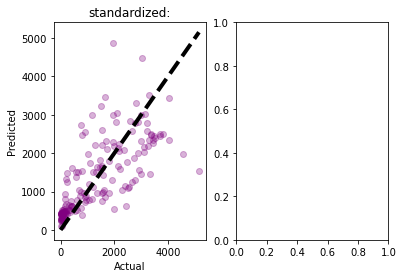

In [1525]:
fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='purple')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')


plt.show()


In [1526]:
RFR = RandomForestRegressor()


kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(RFR, X_train_scaled1, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR, X_train_scaled1, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)
print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))


result for StandardScaler:
R2 score:0.6490383806375767
MAE score:482.984371257485


In [1527]:
k_range = list(range(1, 31))

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [1528]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RFR.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [1529]:

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [1559]:


# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = kf, verbose=2, random_state=42, n_jobs = -1, scoring='r2')
# Fit the random search model
rf_random.fit(X_train_scaled1, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=2)

In [1560]:

print("best R2 score is:")
print(rf_random.best_score_)

best R2 score is:
0.5922517665105684


In [1532]:

kf = KFold(n_splits=5, random_state=42, shuffle=True)
k_r2_scores = []
k_mae_scores = []
k_range = range(30)
for K in k_range:
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    R2_scores_standardized = cross_val_score(model, X_train_scaled1, y_train, cv=kf)
    k_r2_scores.append(R2_scores_standardized.mean())
    y_predict_standardized = cross_val_predict(model, X_train_scaled1, y_train, cv=kf)
    mae_standarsized = MAE(y_train, y_predict_standardized)
    k_mae_scores.append(mae_standarsized)
    
    
print(k_r2_scores)
print(k_mae_scores)




[0.4497036060042152, 0.604824294595175, 0.6287556253878768, 0.6165837676792129, 0.6191826179426307, 0.6173470776690226, 0.6181724879100873, 0.5989226516557802, 0.6025646676808919, 0.5967014772739895, 0.591230987671653, 0.5879831105724437, 0.5811061669164852, 0.5676170071965413, 0.5654980706376396, 0.5581913125455017, 0.549107050843691, 0.5426852985437598, 0.541054850282047, 0.5492265290863587, 0.5503957888459681, 0.551081301181494, 0.5447772504980868, 0.5477107162406812, 0.5455873712863861, 0.5424440249443018, 0.54757458324351, 0.5466923232450591, 0.5397890601465338, 0.5384772485501654]
[651.6586826347306, 546.7694610778443, 515.5149700598803, 527.4491017964071, 542.3017964071856, 545.1007984031937, 544.0094097519247, 548.4625748502993, 550.8429807052562, 559.2191616766468, 566.7659227000544, 568.244510978044, 575.0073698756332, 584.3695466210437, 589.8343313373254, 599.7537425149701, 606.4057766819302, 614.0192947438458, 616.9656476520644, 614.8209580838324, 615.5982321072141, 614.011

2
0.6287556253878768


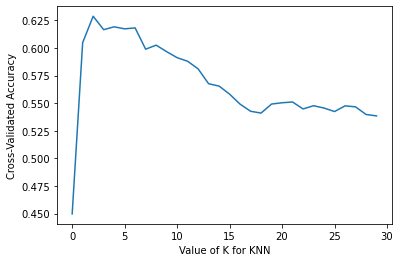

In [1533]:


import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_r2_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

print (k_r2_scores.index(max(k_r2_scores)))
print (max(k_r2_scores))

In [1534]:
df3 = df3.set_index('Country')
df3.head(1)

,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,,
USA,52455948,9995,240513,2893,2825187,334194157,80657


In [1535]:
df3 = df3.replace(regex=['%'], value='') 
df3 = df3.replace(regex=[''], value=np.nan) # empty valuse
df3['Serious,Critical'].fillna('0', inplace = True)
df3 = df3.replace(regex=['N/A'], value=np.nan) # empty valuse


In [1536]:

df3.dropna()
df3.shape

(234, 7)

In [1537]:
for i in df3:
    df3[i] = df3[i].astype(float, errors = 'raise')

df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, USA to Total:
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalRecovered       225 non-null    float64
 1   Serious,Critical     234 non-null    float64
 2   Tot Cases/1M pop     225 non-null    float64
 3   Deaths/1M pop        216 non-null    float64
 4   Tests/
1M pop
       210 non-null    float64
 5   Population           224 non-null    float64
 6   Active Cases/1M pop  220 non-null    float64
dtypes: float64(7)
memory usage: 14.6+ KB


In [1538]:

for rows in range (0,234):
    df3['Serious,Critical'][rows] = df3['Serious,Critical'][rows] / df3['Population'][rows] * 1000000  
    
    

In [1539]:
del df3['TotalRecovered']


In [1540]:
df3.head()

,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,
USA,29.907764,240513.0,2893.0,2825187.0,3.341942e+08,80657.0
India,6.378049,30579.0,366.0,544508.0,1.402310e+09,106.0
Brazil,38.680502,132464.0,3006.0,296573.0,2.150437e+08,9608.0
France,46.633373,342969.0,2099.0,3717379.0,6.551102e+07,35428.0
UK,4.439746,274171.0,2353.0,7003655.0,6.847238e+07,22255.0


In [1541]:
df3.isnull().sum()

Serious,Critical       10
Tot Cases/1M pop        9
Deaths/1M pop          18
Tests/\n1M pop\n       24
Population             10
Active Cases/1M pop    14
dtype: int64

In [1542]:
df3=df3.dropna()
df3.shape

(206, 6)

In [1543]:
def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()
    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' ******************************************************\n')
    
    df = df1.copy()
    return df



In [1544]:

df3 = df3.set_axis(['Serious','TotCases1MPop', 'Deaths1MPop', 'Tests1MPop', 'Population', 'ActiveCases1MPop'
], axis=1, inplace=False)

In [1545]:

df3 = removeOutlier(df3.Serious, df3)
df3 = removeOutlier(df3.TotCases1MPop, df3)
df3 = removeOutlier(df3.Deaths1MPop, df3)
df3 = removeOutlier(df3.Tests1MPop, df3)
df3 = removeOutlier(df3.Population, df3)
df3 = removeOutlier(df3.ActiveCases1MPop, df3)

lowerbound:  -149.5177995146082  -------- upperbound:  204.47268288565698
4  number of outliers from  206
 ******************************************************

lowerbound:  -253204.48624987097  -------- upperbound:  498255.24862610863
1  number of outliers from  202
 ******************************************************

lowerbound:  -2408.1933979340565  -------- upperbound:  4645.5068307698775
3  number of outliers from  201
 ******************************************************

lowerbound:  -6780860.772740485  -------- upperbound:  10045569.964659678
6  number of outliers from  198
 ******************************************************

lowerbound:  -410053481.6973027  -------- upperbound:  490107826.9473027
2  number of outliers from  192
 ******************************************************

lowerbound:  -135669.94590821431  -------- upperbound:  180575.34380295116
6  number of outliers from  190
 ******************************************************



In [1546]:
X = df3.drop("Deaths1MPop", axis=1)
y = df3["Deaths1MPop"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)


In [1547]:
dum_regr = DummyRegressor(strategy="mean")
dum_regr.fit(X_train, y_train)
dum_score = dum_regr.score(X_test, y_test)
y_predict = dum_regr.predict(X_test)
mean_absolute_error = MAE(y_test, y_predict)
print('our dummy model R squared score is ' + str(dum_score)[:6])
print( "our dummy mean absolute error is " + str(mean_absolute_error)[:4])

our dummy model R squared score is -0.008
our dummy mean absolute error is 892.


In [1548]:
scaler1 = StandardScaler()


X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.fit_transform(X_test)


In [1549]:

linreg = LinearRegression()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_1 = cross_val_score(linreg, X_train_scaled1, y_train, cv=kf)
y_predict_1 = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
mae_1 = MAE(y_train, y_predict_1)


print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_1.mean()))
print("MAE score:" +(str)(mae_1))


result for StandardScaler:
R2 score:0.4400896563035145
MAE score:591.216619523107


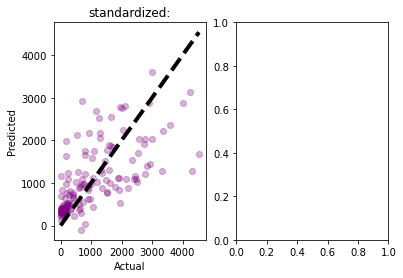

In [1550]:

fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='purple')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')


plt.show()

In [1551]:


RFR = RandomForestRegressor()


kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(RFR, X_train_scaled1, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR, X_train_scaled1, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)
print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))

result for StandardScaler:
R2 score:0.5695716992596289
MAE score:461.9634013605442


In [1552]:

k_range = list(range(1, 31))

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [1553]:

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RFR.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [1554]:


from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}




In [1555]:


# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = kf, verbose=2, random_state=42, n_jobs = -1, scoring='r2')
# Fit the random search model
rf_random.fit(X_train_scaled1, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=2)

In [1556]:

print("best R2 score is:")
print(rf_random.best_score_)



best R2 score is:
0.5917430868257698


In [1557]:

kf = KFold(n_splits=5, random_state=42, shuffle=True)
k_r2_scores = []
k_mae_scores = []
k_range = range(30)
for K in k_range:
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    R2_scores_standardized = cross_val_score(model, X_train_scaled1, y_train, cv=kf)
    k_r2_scores.append(R2_scores_standardized.mean())
    y_predict_standardized = cross_val_predict(model, X_train_scaled1, y_train, cv=kf)
    mae_standarsized = MAE(y_train, y_predict_standardized)
    k_mae_scores.append(mae_standarsized)
    
    
print(k_r2_scores)
print(k_mae_scores)

[-0.08605344272529865, 0.26152367146056876, 0.3555404339760312, 0.38239236445027114, 0.4238161715436079, 0.4317948964764783, 0.42118293787722055, 0.43236707119975143, 0.4494070707744299, 0.44752655925381346, 0.43434176332676283, 0.4473388897090665, 0.4539121171047607, 0.44616462168570176, 0.4480070865818382, 0.4379948504540681, 0.42280186089891564, 0.42382006665020844, 0.4169159464354997, 0.4152944072167214, 0.41276215164073216, 0.41024772869484083, 0.41211859301713416, 0.41291760444863, 0.4051197492917794, 0.3936019075906868, 0.39012613501230187, 0.3892788429953975, 0.3863673853333882, 0.38380588425826156]
[736.2993197278912, 608.0034013605442, 569.8616780045351, 546.9625850340136, 556.1741496598639, 553.172335600907, 560.1477162293489, 554.5918367346939, 541.30007558579, 539.4462585034013, 546.4372294372295, 541.9552154195011, 537.4416535845107, 547.3843537414965, 545.9083900226757, 547.030612244898, 556.0536214485794, 558.3881330309902, 559.6312209094165, 560.5102040816327, 561.8049

12
0.4539121171047607


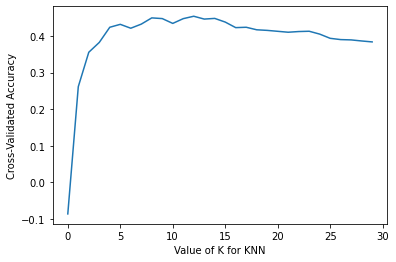

In [1558]:

import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_r2_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

print (k_r2_scores.index(max(k_r2_scores)))
print (max(k_r2_scores))